<h1>Probabilidad y Probabilidad condicionada I </h1>

Comenzamos la discusión basándonos en datos reales. Concretamente, tomamos los datos de la Encuesta Social General (General Social Survey, GSS; ver https://gss.norc.org) realizada por una universidad estadounidense, que contiene información sobre una muestra de 49290 sujetos encuestados. 

Al ser una muestra tan grande, podemos pensar en ella como el total de una población sobre la que deseamos hacernos preguntas y obtener la probabilidad de que un sujeto elegido al azar en dicha población satisfazga ciertas condiciones (relacionadas con el contenido de la encuesta, por supuesto)

Lo primero que hacemos es descargar los datos y/o leerlos de un fichero:

In [1]:
# download('https://github.com/AllenDowney/BiteSizeBayes/raw/master/gss_bayes.csv')
## Tb conviene mirar: 
### https://nbviewer.org/github/AllenDowney/BiteSizeBayes/blob/master/01_linda.ipynb

import pandas as pd
import numpy as np
gss = pd.read_csv('gss_bayes.csv', index_col=0) 
gss

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0
...,...,...,...,...,...,...
2863,2016,57.0,2,1.0,0.0,7490.0
2864,2016,77.0,1,6.0,7.0,3590.0
2865,2016,87.0,2,4.0,5.0,770.0


In [2]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49290 entries, 1 to 2867
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      49290 non-null  int64  
 1   age       49290 non-null  float64
 2   sex       49290 non-null  int64  
 3   polviews  49290 non-null  float64
 4   partyid   49290 non-null  float64
 5   indus10   49290 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.6 MB


Las variables medidas son:

* caseid: ID del encuestado (que es el índice de la tabla). • year: Año en el que se encuestó al encuestado.
* age: Edad del encuestado en el momento de la encuesta.
* sex: Masculino o femenino.
* polviews: Opiniones políticas que van desde liberales hasta conservadoras.
* partyid: Afiliación a un partido político: Demócrata, Republicano o independiente. 
* indus10: Código de la industria en la que trabaja el encuestado.

Por ejemplo, los valores de la variable "polviews" (opiniones políticas) se expresan en una escala de siete puntos:

* 1 Extremadamente liberal
* 2 Liberal
* 3 Ligeramente liberal
* 4 Moderado
* 5 Ligeramente conservador
* 6 Conservador
* 7 Extremadamente conservador

Y la variable "sex" toma los valores $1,2$:

* 1 Hombre
* 2 Mujer

En el caso de "indus10", cada profesión tiene un código específico. En la documentación asociada a la base de datos podemos encontrar todos estos códigos de forma explícita. Por ejemplo,  

* 6870 trabajador de la banca 
* 3790 edificios prefabricados de madera y casas móviles
* 4070 vehículos de motor, piezas y suministros, comerciantes mayoristas

Los valores de "partyid" se codifican de la siguiente manera:

* 0 Demócrata fuerte
* 1 No es un demócrata fuerte
* 2 Independiente, casi demócrata
* 3 Independiente
* 4 Independiente, casi republicano
* 5 No es un republicano fuerte
* 6 Republicano fuerte
* 7 Otro partido

<h3> Definiendo la probabilidad </h3>

Como los datos se han tomado con una muestra muy grande (casi 50000 sujetos encuestados), podemos asumir que la proporción de sujetos que poseen una propiedad A (por ejemplo, ser mujer, o ser un bamcario, o trabajar en la industria de los vehículos de motor), representa la probabilidad de tener esa propiedad si tomamos un sujeto al azar en la población. 
Por ejemplo, la probabilidad de ser bancario en esa población es  calculada del siguiente modo:

In [3]:
# Generamos una lista con todos los individuos. 
# En cada uno de ellos comprobamos si el sujeto trabaja en la banca. 
# Si es así, ponemos True, si no, ponemos False

bancario = (gss['indus10'] == 6870) 
bancario.head()

caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool

In [4]:
# Con la siguiente orden contamos las veces que apareció True (True vale 1 y False vale 0)
bancario.sum()

728

In [5]:
# La probabilidad es, por tanto:
bancario.mean()

0.014769730168391155

In [6]:
# Otra forma de calcularla es:
np.mean(bancario)

0.014769730168391155

Con la siguiente función, podemos calcular la probabilidad de cualquier propiedad A que deseemos estudiar. 

In [7]:
def prob(A):
## Computes the probability of a proposition, A.
## Note that A must be a sequence of booleans
    return A.mean()

In [8]:
prob(bancario)

0.014769730168391155

Análogamente, podemos identificar a las mujeres como aquellos sujetos encuestados que en la variable "sex" tienen anotado un 2. A partir de ahí, podemos hallar la probabilidad de ser mujer:

In [9]:
mujer = (gss['sex'] == 2)
prob(mujer)

0.5378575776019476

Este resultado podría parecer extraño, pero es que el informe GSS no incluye a personas que viven en instituciones como, por ejemplo, prisiones. En este tipo de instituiciones suele haber más hombres que mujeres, por eso se están descartando muchos hombres del informe y por eso la probabilidad de ser mujer parece un tanto excesiva.

Calculemos ahora la probabilidad de ser mujer y trabajar en el sector bancario (ambas cosas a la vez): 

In [10]:
prob(mujer & bancario)

0.011381618989653074

Y ahora obtengamos la probabilidad de que alguna de las dos condiciones se de:

In [11]:
prob(mujer | bancario)

0.5412456887806857

Con respecto a las opiniones (o inclinaciones) políticas, a la vista de lo etiquetado en la variable "polviews", podríamos definir una persona liberal como aquella cuya etiqueta es a lo sumo 3 (es decir, incluimos los etiquetados como extremadamente liberales, los liberales y los moderadamente liberales): 

In [12]:
liberal = (gss['polviews'] <= 3) 
prob(liberal)

0.27374721038750255

Algo similar podemos hacer con los demócratas:

In [13]:
democrata= (gss['partyid']<=1)
prob(democrata)

0.3662609048488537

<h4>Probabilidad condicional</h4>
Supongamos que deseamos conocer la probabilidad de que alguien que sabemos es un bancario (trabaja en banca), sea mujer. ¿Cómo lo hacemos?

In [14]:
seleccion = mujer[bancario] # De entre los bancarios, seleccionamos las mujeres. 
# (Como conjunto, coincide con bancario & mujer)
prob(seleccion) 
# Obsérvese que al hacer la media en prob(), dividimos por el total de bancarios 
# (no por el total de encuestados). 
# Esa es la diferencia con prob(mujer & bancario), donde dividimos por el total de encuestados

0.7706043956043956

In [15]:
# De hecho, el cálculo siguiente da lo mismo:
mujer[bancario].sum()/bancario.sum()

0.7706043956043956

In [16]:
def conditional(proposicion, dado_que): 
    return proposicion[dado_que].sum()/dado_que.sum()

In [17]:
conditional(mujer, bancario)

0.7706043956043956

Si queremos resaltar cual es la condición que se asume (para evitar errores de interpretación), podemos hacer lo siguiente: 

In [18]:
conditional(mujer, dado_que=bancario)

0.7706043956043956

In [19]:
conditional(bancario,mujer)

0.02116102749801969

O, si queremos resaltar cual es la condición que se asume: 

In [20]:
conditional(bancario,dado_que=mujer)

0.02116102749801969

<font color="red"> <h3> Algunos ejercicios sencillos</h3>
 Con los datos del cuestionario GSS,  calcula:
* Probabilidad de trabajar en el sector de edificios prefabricados de madera y casas móviles (3790)
* Lo mismo, pero en el sector de vehículos de motor, piezas y suministros, comerciantes mayoristas (4070)
* Probabilidad de que una mujer sea liberal
* Probabilidad de que un demócrata sea varón
* Probabilidad de que un Independiente, casi republicano, sea en realidad liberal  </font>

<h3> Otro ejemplo: a vueltas con el Titanic </h3>


Retomemos los datos que se usaron en clases anteriores sobre los fallecidos en el Titanic. 

In [21]:
Pasaje=["Primera Clase"]*203+["Primera Clase"]*122+["Segunda Clase"]*118+["Segunda Clase"]*167+["Tercera Clase"]*178+["Tercera Clase"]*528+["Tripulación"]*212+["Tripulación"]*673
Desenlace=["Superviviente"]*203+["Fallecido"]*122+["Superviviente"]*118+["Fallecido"]*167+["Superviviente"]*178+["Fallecido"]*528+["Superviviente"]*212+["Fallecido"]*673
df =pd.DataFrame({'Pasaje':Pasaje,'Desenlace': Desenlace})
pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',margins=True)

Desenlace,Fallecido,Superviviente,Total
Pasaje,,,
Primera Clase,122,203,325
Segunda Clase,167,118,285
Tercera Clase,528,178,706
Tripulación,673,212,885
Total,1490,711,2201


De nuevo, si interpretamos que los pasajeros del Titanic son toda la población y elegimos uno al azar, podemos hacer todo tipo de preguntas sobre probabilidades, que pueden resolverse mirando las correspondientes tablas de contingencia. Lo hacemos aquí de los dos modos: Mirando la tabla de contingencia y ccalculando las probabilidades tal como hicimos antes.

Por ejemplo, la probabilidad de ser pasajero de Primera Clase es:

In [22]:
325/2201

0.14766015447523853

Obsérvese que este valor coincide con mirar la correspondiente entrada en la tabla de contingencia normalizada:

In [23]:
TC=pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',margins=True,normalize=True)
TC

Desenlace,Fallecido,Superviviente,Total
Pasaje,,,
Primera Clase,0.055429,0.092231,0.147660
Segunda Clase,0.075875,0.053612,0.129487
Tercera Clase,0.239891,0.080872,0.320763
Tripulación,0.305770,0.096320,0.402090
Total,0.676965,0.323035,1.000000


Pero también podríamos haberlo calculado así:

In [24]:
C1 = (df['Pasaje']=='Primera Clase')
prob(C1)

0.14766015447523853

De forma similar, podemos afirmar que la probabilidad de sobrevivir es (este valor también aparece en la tabla de contingencia):

In [25]:
711/2201

0.3230349840981372

O, también:

In [26]:
superv = (df['Desenlace']=='Superviviente')
prob(superv)

0.3230349840981372

Veamos ahora algunas probabilidades condicionadas. Comenzamos con la tabla de contingencia condicionada por columnas:

In [27]:
TCM1=pd.crosstab(df['Pasaje'],df['Desenlace'],normalize='columns')
TCM1

Desenlace,Fallecido,Superviviente
Pasaje,,
Primera Clase,0.081879,0.285513
Segunda Clase,0.112081,0.165963
Tercera Clase,0.354362,0.250352
Tripulación,0.451678,0.298172


Esta tabla indica que, por ejemplo, la probabilidad de pertenecer a Primera Clase sabiendo que has sobrevivido, es 0.285513. También podemos calcularla directamente:

In [28]:
conditional(C1,dado_que=superv) 

0.28551336146272854

Análogamente, la tabla de contingencia condicionada por filas nos dice que la probabilidad de sobrevivir sabiendo que estamos en Primera Clase es 0.624615 (ver la tabla):

In [29]:
TCM2=pd.crosstab(df['Pasaje'],df['Desenlace'], margins_name='Total',normalize='index')
TCM2

Desenlace,Fallecido,Superviviente
Pasaje,,
Primera Clase,0.375385,0.624615
Segunda Clase,0.585965,0.414035
Tercera Clase,0.747875,0.252125
Tripulación,0.760452,0.239548


En efecto:

In [30]:
conditional(superv,dado_que=C1) ## Dado que es de primera clase, probabilidad de sobrevivir

0.6246153846153846

<h2> Un poco de teoría</h2>

En todo lo anterior, hemos tratado la probabilidad de un suceso $A$ como una frecuencia. Concretamente, hemos asumido que tenemos una población finita y que al observar una característica, la probabilidad de que un individuo "elegido al azar" tenga dicha característica coincide con la frecuencia con la que esa caracteristica aparece:

$$ P(A)= \frac{\#\{\text{Individuos que tienen la propiedad A}\}}{\#\{\text{Total de individuos}\}}$$

En realidad, esto es sencillamente <strong> una forma concreta de definir el azar </strong>. En esta forma concreta hemos asumido que <strong>todos los sujetos tienen la misma probabilidad de ser elegidos</strong>. Se dice que el experimento que estamos realizando -o, si se quiere, el espacio de probabilidad que estamos definiendo- es <strong> Laplaciano</strong> (en honor al matemático francés Laplace). 

Es evidente que hay muchas situaciones en las que no todos los sucesos elementales de un experimento aleatorio tienen la misma probabilidad. (Por ejemplo, sacar una bola roja de una urna que contiene 3 bolas rojas y 5 blancas, todas idénticas excepto por el color, debe tener una probabilidad diferente de sacar una bola blanca. Si el suceso elemental es "qué bola concreta sacamos, independientemente del color", los sucesos son equiprobables, y eso nos permite decir que $P(blanca)=5/8$ pero $P(roja)=3/8$. Pero si el resultado elemental del experimento es sencillamente el color de la bola, entonces los sucesos elementales tienen probabilidades distintas (5/8 y 3/8, respectivamente). Entonces, ¿cuál es la definición general de probabilidad? 

<h3> Posibles definiciones de la probabilidad $P(A)$ </h3>

* La primera opción es la del Experimento Laplaciano. En ese caso, todos los sucesos elementales tienen identica probabilidad y basta mirar la frecuencia con la que se satisface la propiedad $A$.

* Si no asumimos un experimento Laplaciano (por ejemplo, porque hay infinitos sucesos elementales), debemos decidir qué significa $P(A)$.  


La solución más directa, y la que menos preocupaciones genera, es sencillamente asumir una definición axiomática de lo que entendemos por " medida de probabilidad " o, sencillamente, proabilidad. Se trata de ignorar los aspectos filosóficos del asunto y ceñirnos a una definición matemática precisa. Una probabilidad es una función definida sobre cierto espacio (de sucesos o eventos) que tiene ciertas propiedades, y ya está. Cada vez que definamos una de estas funciones, tendremos una medida de probabilidad y a ella podremos aplicarle todos los teoremas y propiedades que seamos capaces de demostrar. Concfretamente, se procede del siguiente modo:

<strong> Definición: </strong> Dado un conjunto no vacío $\Omega$ (al que llamamos espacio de sucesos elementales), consideramos una familia $\Sigma\subseteq 2^{\Omega}=\mathcal{P}(\Omega)$ formada por subconjuntos de $\Omega$, que satisface las siguientes propiedades:
* $\emptyset,\Omega\in\Sigma$
* Si $\{A_1,\cdots, A_n, \cdots \}\subseteq \Sigma$, entonces $\bigcup A_k\in\Sigma$
* Si $A\in\Sigma$, entonces $A^c=\Omega\setminus A\in\Sigma$.

Consideramos también <font color="blue"> una función $P:\Sigma\to [0,1]$ que satisface:
* $P(\emptyset)=0$
* Si $\{A_1,\cdots, A_n, \cdots \}\subseteq \Sigma$ y $A_i\cap A_j=\emptyset$ cuando $i\neq j$, entonces  $P(\bigcup A_k)=\sum_{k=1}^{\infty}P(A_k)$. 
* $P(A^c)=1-P(A)$, si $A\in \Sigma$.

La tripleta $(\Omega,\Sigma, P)$ se llama espacio de probabilidad y $P$ decimos que es una medida de probabilidad sobre $\Sigma$. Los elementos de $\Sigma$ se llaman eventos o sucesos del espacio de probabilidad, y son los únicos conjuntos cuya probabilidad podemos medir.</font>

La definición anterior se debe a Kolmogorov, y fue el paso definitivo para establecer un fundamento sólido en la teoría de la probabilidad. Nos proporciona una descripción matemática sencilla y bien motivada de las propiedades que debe tener cualquier medida de probabilidad que queramos considerar. Sin embargo, no responde a la cuestión más profunda de qué es la probabilidad cuando tratamos con experimentos aleatorios en el mundo real. No nos indica cuál es la naturaleza última del concepto. En particular, no nos proporciona ningún tipo de indicación sobre, entre todas las medidas de probabilidad posibles que existen y que podríamos aplicar a un experimento concreto, cuál es precisamente la que nos da la "verdadera" probabilidad de los sucesos que queremos examinar. Estas son, en realidad, cuestiones de orden filosófico, aunque tienen implicaciones profundas en el uso de la probabilidad en aplicaciones reales, como la construcción de algoritmos asociados a la inteligencia artificial.  

<strong> Ejemplo: Experimentos de Laplace </strong> Si $\Omega$ es un conjunto finito, $\Sigma=2^\Omega$ es una $\sigma$-álgebra y $$P(A)=\frac{\#A}{\# \Omega}$$
define una medida de probabilidad (llamada probabilidad de Laplace). 
* Se trata de un ejemplo trivial desde el punto de vista teórico 
*  Sin embargo, dado un experimento $\mathcal{E}$ cuyo espacio muestral asociado es finito, puede ser extremadamente complicado obtener una buena representación de $\Omega$ en la que sea posible contar. Este es, de hecho, el problema fundamental de la <strong>combinatoria</strong>. 

<strong>Ejemplo: Probabilidad geométrica </strong> Si $\Omega \subseteq \mathbb{R}^d$ es un conjunto medible de Lebesgue con medida finita, podemos considerar  $\Sigma=\{A\in 2^\Omega: |A|<\infty\}$ y  $$P(A)=\frac{|A|}{|\Omega|}$$
define una medida de probabilidad en $\Omega$ que generaliza a la perfeccción la probabilidad de Laplace del ejemplo anterior. 
 



Si nos preocupan los aspectos filosóficos del problema de definir un concepto de probabilidad conectado con el mundo real, no hay una respuesta definitiva porque hay disensión entre diferentes escuelas de pensamiento. Por un lado, están los <strong> frecuentistas</strong> que consideran que la probabilidad de un evento $A$ surge de repetir el mismo experimento un número cada vez más elevado de veces -todas en condiciones idénticas e independientes- y contabilizar la frecuencia con la que observamos el suceso $A$. Esa frecuencia, cuando el número $n$ de veces que repetimos el experimento tiende a infinito, converge a un único valor, que es $P(A)$.   

* Lo anterior es, en gran medida, el enunciado de un importante teorema: La <strong>ley débil de los grandes números</strong>, de Bernoulli. Y en ningún modo es un resultado trivial. 

Sin embargo, existen importantes dificultades en aplicar este concepto de probabilidad. Para empezar, este concepto deja de lado un montón de casos en los que nos gustaría asignar una probabilidad, por la sencilla razón de que se trata de experimentos irrepetibles o experimentos cuya repetición es demasiado costosa en algún sentido. Además, incluso en experimentos fácilmente repetibles, como el lanzamiento de un dado, nadie jamás podrá repetir el experimento infinitas veces y por tanto no tenemos certeza de que la probabilidad de cada una de las caras del dado vale 1/6. Es más, al repetir el experimento muchas veces, el dado se degastará y podría perder su simetría - que es el verdadero motivo por el que asumimos que las caras son equiprobables (se trata, por tanto, de una hipótesis teórica, de naturaleza geométrica, que nada tiene que ver con repetir el experimento muchas veces) Hay más razones para desconfiar del concepto frecuentista de probabilidad, pero no las exponemos aquí por brevedad.

Por otro lado, está la escuela <strong> Bayesiana</strong>, según la cual la probabilidad es una medida de nuestra ignorancia, y la forma correcta de proceder es establecer unas probabilidades a priori -que expresan lo que creemos conocer sobre el experimento antes de realizarlo- y luego usar el teorema de Bayes para que cada repetición del experimento nos facilite recalcular -recalibrar, reconsiderar- las probabilidades que creíamos conocer. Conforme repetimos el experimento, este nos ayuda -con los resultados obtenidos- a modificar nuestras creencias, y estas (que son solo eso) se van acercando cada vez más a la verdadera probabilidad que queremos conocer.  


<h2> Algunas propiedades importantes de las medidas de probabilidad</h2>

Asumamos que $(\Omega,\Sigma,P)$ es un espacio de probabilidad. Entonces se tiene:

<font color="blue"> <strong> Proposición</strong> Dados dos sucesos $A,B$, se tiene que $P(A\cup B)=P(A)+P(B)-P(A\cap B)$.  </font>

En efecto, $\{A\setminus (A\cap B),A\cap B\}$ es una partición de $A$ en sucesos disjuntos, por lo que 
$$P(A)=P(A\setminus (A\cap B))+P(A\cap B)$$
Análogamente, $$P(B)=P(B\setminus (A\cap B))+P(A\cap B)$$ y  $$P(A\cup B)=P(A\setminus (A\cap B))+P(B\setminus (A\cap B))+P(A\cap B)$$ 
de modo que:
$$ P(A\cup B) = P(A\setminus (A\cap B))+P(A\cap B) -P(A\cap B) + P(B\setminus (A\cap B))+P(A\cap B)$$
$$ = P(A)+ P(B) -P(A\cap B)$$


Dado  $(\Omega,\Sigma,P)$ un espacio de probabilidad y dado un suceso $B\in \Sigma$ tal que $P(B)>0$, Podemos considerar en $B$ los sucesos:
$$
\Sigma_{|B}=\{A\cap B: A\in \Sigma\} \subseteq 2^B,
$$
con lo que $P_{|B}:\Sigma_{|B}\to [0,1]$ definida por $$P_{|B}(A\cap B)=\frac{P(A\cap B)}{P(B)}$$ define una medida de probabilidad y $(B,\Sigma_{|B},P_{|B})$ define un espacio de probabilidad. Esto sirve como motivación para el siguiente concepto:


<font color="blue"><strong>Definición (Probabilidad condicionada)</strong>:
Dados dos sucesos $A,B$, con $P(B)>0$. La probabilidad de $A$, dado $B$, es:
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$ 



<strong>Definición (Sucesos independientes)</strong>:
Dados dos sucesos $A,B$, se dice que son independientes si $$P(A\cap B)=P(A)P(B).$$  </font>


Obsérvese que, en el caso de que $P(B)>0$, la independencia de ambos sucesos se traduce en la identidad:
$$
P(A|B)=P(A)
$$

<strong>Definición (Familia de sucesos independientes)</strong>:
Dados los sucesos $\{A_1,A_2,\cdots,A_m\}$, se dice que son independientes si, para todo $k\leq m$ y todo vector $(i_1,i_2,\cdots,i_k)\in\{1,\cdots,m\}^k$ con $i_1<i_2<\cdots <i_k$, se tiene que 
 $$P(A_{i_1}\cap A_{i_2}\cap \cdots \cap A_{i_k})=\prod_{s=1}^k P(A_{i_s})$$.  

Además, la familia de sucesos $\{A_i\}_{i=1}^{\infty}$ se dice que es independiente si para todo $m\geq 1$,  $\{A_1,A_2,\cdots,A_m\}$ forma una familia de sucesos independientes.


<font color="blue"> <strong>Teorema de la Probabilidad Total</strong> 
Sea $\{B_1,B_2,\cdots,B_m\}$ una familia de sucesos disjuntos dos a dos cuya unión es $\Omega$ (se dice que estos conjuntos forman una partición de $\Omega$ en sucesos). Sea $A$ otro suceso. Entonces
$$
P(A)=\sum_{k=1}^mP(A\cap B_k) =\sum_{k=1}^mP(A|B_k)P(B_k).
$$
(Asumimos, para la segunda igualdad, que $P(B_k)>0$ para todo $k$). </font>


De este modo, a menudo es posible conocer $P(A)$ a partir de su ''dependencia'' respecto de los sucesos $B_1,\cdots,B_m$. 


<font color="blue"><strong>Teorema de Bayes </strong> 
Sean $A,B$ sucesos con probabilidad positiva. Entonces
$$
P(B|A)=\frac{P(A|B)P(B)}{P(A)} = \frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|B^c)P(B^c)}.
$$
(Asumimos, para la segunda igualdad, que $0<P(B)<1$, por lo que también $0<P(B^c)<1$).

En general, si la familia $\{B_i\}_{i=1}^{m}$ forma una partición de $\Omega$ en sucesos de probabilidad positiva, tenemos que:
$$
P(B_i|A)=\frac{P(A|B_i)P(B_i)}{\sum_{k=1}^{m}P(A|B_k)P(B_k)}, \text{ para } i=1,2,\cdots.
$$</font>



<h3> Aplicación: uso de Bayes para estimar probabilidades en sucesos del mundo real</h3>

El Teorema de Bayes permite actualizar la probabilidad de una hipótesis, $H$, dado un conjunto de datos, $D$.

Esta interpretación es “diacrónica”, lo que significa “relacionada con el cambio a lo largo del tiempo”; en este caso, la probabilidad de las hipótesis cambia a medida que vemos nuevos datos.


Reescribiendo el Teorema de Bayes con H y D obtenemos: 

$$P(H|D)=\frac{P(D|H)P(H)}{P(D)}$$

* $P(H)$ es la probabilidad de la hipótesis antes de que veamos los datos, llamada probabilidad a priori.
* $P(H|D)$ es la probabilidad de la hipótesis después de que vemos los datos, llamada probabilidad a posteriori.
* $P(D|H)$ es la probabilidad de los datos bajo la hipótesis $H$, y se llama verosimilitud.
* $P(D)$ es la probabilidad de los datos, sin asumir ninguna hipótesis.

A veces podemos calcular la probabilidad a priori basándonos en la información que tenemos  sobre el experimento. Por ejemplo, cuando hay ciertas simetrías, estas nos permiten definir cieertas probabilidades. 

En otros casos, la probabilidad a priori es subjetiva; es decir, incluso personas totalmente racionales (y razonables, bien intencionadas) podrían no  estar de acuerdo en el valor de $P(H)$, ya sea porque contextualizan el experimento de modo diferente o porque interpretan la misma información de manera diferente.


La probabilidad $P(D|H)$ suele ser la parte más fácil de calcular porque la información aportada por la hipótesis $H$ es clave para conocer esta probabilidad. 

Calcular la probabilidad total de los datos puede ser más complicado. No lo es tanto si disponemos de una partición del espacio muestral en distintas hipótesis mutuamente excluyentes y aplicamos el teorema de la probabilidad total. 

Concretamente, supongamos que realizamos un experimento aleatorio y que  $\{H_i\}_{i=1}^{m}$ forma una partición del espacio muestral $\Omega$ en sucesos que podemos asumir tienen todos probabilidad positiva, pero <strong> desconocida</strong> y que queremos conocerla o al menos aproximarla. Cada uno de estos eventos $H_i$ es una de nuestras hipótesis.  

La forma de proceder es asumir inicialmente unas probabilidades "a priori" $P(H_i)$ -por ejemplo, podríamos asumir que estamos ante sucesos equiprobables y, por tanto $P(H_i)=1/m$ para todo $i$. Si al realizar el experimento obtenemos el suceso $D$ (que representa los datos aportados por la experiencia) y tenemos la suerte de conocer $P(D|H_i)$ para todo $i$ (lo cual tiene visos de ser así si hemos elegido apropiadamente las hipótesis $H_i$), entonces sabremos que
$$
P(H_i|D)=\frac{P(D|H_i)P(H_i)}{\sum_{k=1}^{m}P(D|H_k)P(H_k)}, \text{ para } i=1,2,\cdots,m
$$
y lo que podemos hacer es cambiar nuestra creencia inicial por el valor que acabamos de obtener $$P(H_i)\leftarrow P(H_i|D)=\frac{P(D|H_i)P(H_i)}{\sum_{k=1}^{m}P(D|H_k)P(H_k)}$$ 
De este modo, <strong>cada vez que realizamos el experimento, renovamos nuestras creencias sobre el valor verdadero de las probabilidades </strong> $P(H_i)$ <strong> guiados por la experiencia</strong>, proceso que se conoce como <strong> Actualización Bayesiana</strong> En esto consiste, en gran medida, el análisis Bayesiano y la concepción Bayesiana de la probabilidad. Estas ideas son fundamentales para el desarrollo de algoritmos de inteligencia artificial, que deben aprender de la experiencia. 




<h2> Juegos con urnas, dados, cartas, etc. </h2>

Veamos cómo podemos usar Python para simular experimentos aleatorios con urnas, dados, cartas, etc. 

Comencemos con el caso más sencillo: simular la extracción de una bola de una urna que contiene cierta cantidad conocida de bolas de distintos colores. 

<strong> Ejemplo </strong> Construir una urna con 10 bolas rojas y 5 blancas y simular la estracción de una bola de la urna.

In [31]:
import random
from collections import Counter

In [32]:
urna1=["R"]*10+["B"]*5
urna1

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B']

In [33]:
resultado = np.random.choice(urna1) 
## Para la extracción con reemplazamiento, usamos np.random.choice
## Si quisiéramos hacer la extracción sin reemplazamiento usaríamos random.sample
print(resultado)

B


Otra forma de realizar la extracción es definir una urna con una sola bola de cada color y proponer una estracción con las probabilidades adecuadas:

In [34]:
urna2=["R","B"]
resultado = np.random.choice(urna2, p=[10/15,5/15])
print(resultado)

R


Si en vez de una única extracción, deseamos repetir la extracción 40 veces, de forma independiente, procedemos como sigue:

O bien tomamos la urna1: 

In [35]:
resultado = np.random.choice(urna1,size=40)
print(resultado)

['R' 'B' 'R' 'R' 'R' 'R' 'B' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R'
 'B' 'B' 'R' 'B' 'R' 'B' 'R' 'B' 'B' 'B' 'R' 'R' 'B' 'R' 'B' 'R' 'R' 'R'
 'B' 'R' 'R' 'R']


In [36]:
Counter(resultado)

Counter({'R': 26, 'B': 14})

O bien tomamos la urna2 pero asignamos las probabilidades adecuadamente:

In [37]:
urna2=["R","B"]
resultado = np.random.choice(urna2, size=40, p=[10/15,5/15])
print(resultado)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'B' 'R' 'R' 'R' 'B' 'B' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'B' 'R'
 'R' 'R' 'B' 'R']


In [38]:
Counter(resultado)

Counter({'R': 33, 'B': 7})

<strong> Ejemplo </strong> Construir una urna con 10 bolas rojas y 15 blancas, y 13 verdes y simular la extracción de 100 bolas de la urna. Hacerlo de dos formas distintas.

In [39]:
## Primer modo:
urna1=["R"]*10+["B"]*15+["G"]*13
print(urna1)
resultado1 = np.random.choice(urna1,size=100)
print(resultado1)
Counter(resultado1)

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']
['R' 'B' 'G' 'G' 'R' 'G' 'G' 'G' 'G' 'G' 'B' 'R' 'R' 'G' 'G' 'R' 'G' 'B'
 'R' 'R' 'G' 'B' 'G' 'B' 'R' 'G' 'G' 'G' 'R' 'R' 'B' 'R' 'B' 'G' 'G' 'R'
 'B' 'R' 'G' 'B' 'G' 'R' 'B' 'R' 'R' 'G' 'B' 'G' 'B' 'B' 'R' 'R' 'G' 'G'
 'G' 'B' 'G' 'B' 'G' 'B' 'G' 'B' 'B' 'G' 'B' 'G' 'B' 'B' 'G' 'B' 'B' 'R'
 'R' 'R' 'B' 'R' 'B' 'B' 'B' 'R' 'R' 'B' 'B' 'G' 'B' 'G' 'B' 'G' 'B' 'G'
 'B' 'R' 'R' 'B' 'B' 'G' 'B' 'R' 'B' 'B']


Counter({'R': 27, 'B': 38, 'G': 35})

In [40]:
## Segundo modo:
urna2=["R","B","G"]
print(urna2)
resultado2 = np.random.choice(urna2,size=100,p=[10/38,15/38,13/38])
print(resultado2)
Counter(resultado2)

['R', 'B', 'G']
['G' 'R' 'B' 'G' 'G' 'G' 'B' 'G' 'G' 'G' 'R' 'R' 'G' 'G' 'R' 'B' 'G' 'B'
 'R' 'B' 'G' 'R' 'G' 'R' 'G' 'B' 'G' 'B' 'R' 'G' 'B' 'R' 'B' 'G' 'G' 'G'
 'B' 'G' 'B' 'B' 'G' 'G' 'B' 'B' 'B' 'B' 'B' 'R' 'G' 'B' 'G' 'G' 'B' 'G'
 'B' 'R' 'R' 'G' 'B' 'G' 'R' 'B' 'R' 'R' 'G' 'G' 'R' 'R' 'R' 'B' 'G' 'B'
 'G' 'R' 'R' 'G' 'G' 'B' 'G' 'B' 'G' 'G' 'B' 'B' 'B' 'B' 'R' 'B' 'B' 'B'
 'R' 'G' 'R' 'G' 'R' 'B' 'R' 'G' 'B' 'R']


Counter({'G': 39, 'R': 26, 'B': 35})

 <strong> Ejemplo </strong> 
Construir un dado de 6 caras y:
* Simular 500 lanzamientos.
* Simular 500 lanzamientos dobles, en cada lanzamiento apuntar la suma de los valores obtenidos. Contabilizar las frecuencias que se han observado.

In [41]:
dado=[1,2,3,4,5,6]
resultado = np.random.choice(dado,size=500)
print(resultado)
Counter(resultado)

[5 5 4 6 3 4 6 3 3 6 4 4 6 4 4 2 5 2 6 5 5 1 2 5 5 5 3 2 3 5 5 1 1 6 6 6 6
 4 6 3 1 4 6 6 5 3 2 3 2 5 3 6 6 2 2 4 1 3 2 3 4 1 5 6 2 2 4 5 1 5 6 6 5 5
 1 1 4 5 3 2 5 2 4 2 6 5 4 4 1 2 3 2 1 2 4 2 5 1 2 3 6 6 3 4 6 3 1 6 2 5 4
 1 3 1 5 2 2 5 3 4 5 1 1 3 5 1 4 4 5 2 1 4 6 5 3 2 2 3 2 5 5 3 3 2 4 1 6 4
 3 5 6 2 4 4 3 4 3 2 6 4 2 4 3 2 5 5 1 5 6 1 3 6 6 1 3 3 4 6 6 1 6 6 5 1 5
 6 1 4 6 1 5 6 3 4 1 6 6 1 5 4 1 4 1 2 2 1 6 4 6 4 5 4 6 5 1 6 4 1 1 1 1 2
 6 5 2 2 5 1 3 5 6 3 4 4 6 5 4 6 6 3 1 4 4 2 4 5 6 1 2 1 3 4 4 2 4 2 4 3 4
 4 5 3 2 6 4 6 1 1 1 3 4 6 6 4 1 2 2 2 1 5 4 1 5 6 4 1 4 4 4 3 2 2 5 2 1 5
 2 2 4 3 6 1 5 2 3 6 2 2 2 6 6 4 1 6 1 3 3 3 5 1 5 4 2 1 4 2 6 6 2 5 5 1 1
 5 5 5 6 1 2 2 6 2 6 3 2 2 6 4 1 3 2 5 6 6 5 4 3 2 1 6 3 1 3 3 2 3 6 4 1 6
 3 3 1 4 5 5 2 1 3 4 2 4 1 5 6 3 2 3 2 5 5 3 2 6 3 5 2 1 2 6 1 4 3 6 1 3 4
 3 4 2 4 2 3 2 6 3 3 6 3 2 2 3 6 4 6 3 1 3 4 2 2 4 1 3 6 3 1 6 5 1 5 3 2 5
 2 4 6 3 2 3 2 6 1 4 6 3 4 4 4 5 4 6 4 2 1 5 6 3 6 4 3 1 2 4 6 4 1 5 5 2 6
 6 6 6 5 6 3 3 1 2 6 3 6 

Counter({5: 75, 4: 86, 6: 94, 3: 80, 2: 88, 1: 77})

In [42]:
dado=[1,2,3,4,5,6]
resultadoglobal = []
for i in range(500):
    resultado1 = np.random.choice(dado)
    resultado2 = np.random.choice(dado)
    resultado=resultado1+resultado2
    resultadoglobal.append(resultado)
print(resultadoglobal)
Counter(resultadoglobal)

[10, 7, 8, 10, 11, 7, 4, 6, 6, 10, 6, 11, 7, 5, 6, 5, 6, 10, 6, 7, 3, 11, 8, 4, 5, 9, 4, 8, 4, 7, 6, 2, 8, 7, 7, 4, 3, 8, 7, 4, 2, 3, 7, 10, 5, 11, 8, 11, 4, 9, 8, 8, 8, 6, 6, 11, 8, 9, 7, 8, 3, 6, 8, 5, 11, 9, 6, 5, 10, 6, 8, 7, 8, 9, 10, 9, 7, 8, 5, 7, 5, 9, 4, 4, 9, 7, 7, 2, 3, 3, 12, 6, 9, 4, 4, 8, 9, 7, 5, 10, 9, 8, 9, 9, 5, 4, 2, 10, 8, 5, 8, 7, 5, 10, 7, 8, 9, 3, 7, 5, 11, 9, 8, 7, 7, 7, 6, 11, 4, 10, 7, 6, 4, 3, 5, 5, 7, 6, 4, 4, 3, 6, 9, 6, 4, 12, 8, 12, 6, 10, 5, 11, 7, 8, 10, 10, 7, 9, 6, 6, 3, 6, 11, 9, 7, 3, 4, 6, 5, 11, 7, 9, 6, 8, 7, 8, 5, 7, 5, 7, 9, 9, 9, 9, 8, 8, 5, 5, 12, 5, 11, 3, 6, 9, 2, 6, 12, 10, 9, 5, 10, 5, 11, 8, 8, 8, 11, 6, 7, 9, 10, 9, 4, 8, 5, 10, 7, 9, 9, 10, 7, 5, 9, 9, 7, 4, 7, 8, 3, 4, 8, 10, 7, 3, 6, 7, 3, 9, 10, 8, 8, 8, 6, 7, 9, 10, 5, 5, 9, 9, 3, 11, 2, 8, 5, 5, 7, 9, 6, 9, 9, 4, 10, 8, 3, 11, 4, 12, 4, 7, 8, 3, 7, 9, 7, 10, 9, 10, 8, 4, 11, 5, 8, 9, 4, 9, 10, 6, 12, 5, 6, 10, 3, 5, 8, 11, 5, 8, 4, 5, 6, 4, 3, 6, 7, 4, 11, 5, 12, 11, 6, 8, 10, 10,

Counter({10: 44,
         7: 88,
         8: 74,
         11: 28,
         4: 43,
         6: 52,
         5: 56,
         3: 34,
         9: 60,
         2: 10,
         12: 11})

Obsérvese que los valores extremos (cercanos a 2, que es el mínimo posible, o a 12, que es el máximo posible, son los menos frecuentes. Esto es así porque hay menos formas de obtener esos valores que los valores centrales:
* $2= 1+1$
* $3=2+1=1+2$
* $4=3+1=2+2=1+3$
* $5=4+1=3+2=2+3=1+4$
* $6=5+1=4+2=3+3=2+4=1+5$
* $7=6+1=5+2=4+3=3+4=2+5=6+1$
* $8=6+2=5+3=4+4=3+5=2+6$
* $9=6+3=5+4=4+5=3+6$
* $10=6+4=5+5=4+6$
* $11=6+5=5+6$
* $12=6+6$

<strong> Ejemplo  </strong> Simular la extracción, <strong>sin reemplazamiento</strong>, de 7 bolas de una urna que contiene <font color="red"> 3 bolas rojas</font>, <font color="green">2 verdes</font> y <font color="blue">5 azules</font> (todas idénticas excepto por el color). 

In [43]:
urna = ['red'] * 3 + ['green'] * 2 + ['blue'] * 5
resultado = random.sample(urna, 7)
resultado

['green', 'red', 'green', 'blue', 'red', 'blue', 'red']

<strong>Ejemplo</strong> Simular la extracción de una mano en una baraja de póquer.

In [44]:
baraja = []
palos=["oros","bastos","copas","espadas"]

for palo in palos:
    for i in range(1,13):
        baraja.append([palo,i])
    
mano = random.sample(baraja, 5)
print(mano)
print(mano[4][1])

[['oros', 10], ['copas', 4], ['espadas', 2], ['copas', 3], ['oros', 12]]
12


Completa el programa anterior contando cuántas veces sale cada número. Por ejemplo, si tenemos dos ases, y el resto de cartas distintas, el número 1 aparecerá 2 veces y luego habrá otros tres números, cada uno de los cuales aparece 1 sola vez)

In [45]:
import pandas as pd
baraja = []
palos=["oros","bastos","copas","espadas"]

for palo in palos:
    for i in range(1,13):
        baraja.append([palo,i])
    
mano = random.sample(baraja, 5)
print(mano)

numeros=[]
for i in range(5):
    numeros.append(mano[i][1])

print(numeros)

frecuencia = pd.Series(numeros).value_counts()

df = frecuencia.reset_index()
df.columns = ['Número', 'Counts']

print(df)

[['bastos', 8], ['copas', 2], ['bastos', 6], ['copas', 6], ['copas', 12]]
[8, 2, 6, 6, 12]
   Número  Counts
0       6       2
1      12       1
2       2       1
3       8       1


<strong> Ejercicio</strong> Simular 1000 lanzamientos de una moneda trucada, en la que la probabilidad de cara es 0.4 y la de cruz es 0.6. Comprobar mediante un gráfico que las frecuencias relativas de los sucesos elementales (cara y cruz) deben tienden hacia las probabilidades que se han asumido. 

In [46]:
import random
from collections import Counter


moneda = ["cara", "cruz"]


probabilidades = [0.4, 0.6]

# Simulamos los 1000 lanzamientos de la moneda
resultado2 = random.choices(moneda, weights=probabilidades, k=1000)


counts = Counter(resultado2)

# Normalize the counts by the total number of samples
normalized_counts = {key: count / len(resultado2) for key, count in counts.items()}

# Print the normalized counts
print(normalized_counts)

{'cara': 0.418, 'cruz': 0.582}


In [47]:
counts

Counter({'cara': 418, 'cruz': 582})

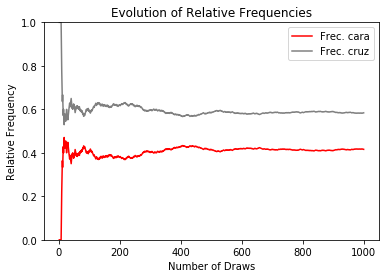

In [48]:
import random
import matplotlib.pyplot as plt
from collections import Counter


moneda = ["cara", "cruz"]


probabilidades = [0.4, 0.6]


resultado2 = random.choices(moneda, weights=probabilidades, k=1000)


frec_cara = []
frec_cruz = []


for i in range(1, 1001):
    counts = Counter(resultado2[:i])
    frec_cara.append(counts["cara"] / i)
    frec_cruz.append(counts["cruz"] / i)

# Plot the evolution of the relative frequency of "cara"
plt.plot(range(1, 1001), frec_cara, color='red', label="Frec. cara")
plt.plot(range(1, 1001), frec_cruz, color='gray', label="Frec. cruz")

# Label the axes and add a title
plt.xlabel("Number of Draws")
plt.ylabel("Relative Frequency")
plt.title("Evolution of Relative Frequencies")

# Show the legend
plt.legend()

# Set y-axis limits to (0, 1) similar to R code
plt.ylim(0, 1)

# Display the plot
plt.show()

<strong> Ejemplo</strong> Se tienen tres urnas con bolas indistinguibles excepto por su color. La primera urna contiene <font color="red"> 2 bolas rojas</font> y <font color="blue"> 4 azules</font>, la segunda contiene <font color="red"> 5 bolas rojas</font> y <font color="blue"> 2 azules</font>; y la última urna contiene <font color="red"> 4 bolas rojas</font> y <font color="blue"> 3 azules</font>. Se toma una de las urnas al azar y, a partir de ahí, se van sacando bolas, con reemplazamiento. Averiguar en base a los resultados que se van obteniendo, de qué urna se sacan las bolas. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos las urnas
U1 = ["R"] * 2 + ["B"] * 4
U2 = ["R"] * 5 + ["B"] * 2
U3 = ["R"] * 4 + ["B"] * 3
urnas = [1, 2, 3]

# Probabilidades condicionales P(R|Ui) y P(B|Ui) 
probRojaUi = np.array([2 / 6, 5 / 7, 4 / 7])
probBlancaUi = 1 - probRojaUi

# Probabilidad inicial de la elección de urnas P(U1)=P(U2)=P(U3)=1/3
probs = np.array([1/3, 1/3, 1/3])

# Elegimos urna
urna = random.choice(urnas)

# Extraemos 200 bolas de la urna elegida
if urna == 1:
    bolas = random.choices(U1, k=200)
elif urna == 2:
    bolas = random.choices(U2, k=200)
else:
    bolas = random.choices(U3, k=200)

In [50]:
# Definimos una matriz que va a almacenar la evolución of las probabilidades
prob_evol = np.zeros((200, 3))

# Almacenamos nuestra creencia inicial
prob_evol[0, :] = probs

# Actualización Bayesiana de nuestras creencias

for i in range(199):
    if bolas[i] == "R":
        probs = probs * probRojaUi / np.sum(probs * probRojaUi)
    elif bolas[i] == "B":
        probs = probs * probBlancaUi / np.sum(probs * probBlancaUi)
    prob_evol[i + 1, :] = probs

# Creencia final (tras la última extracción)
print("Urna seleccionada:", urna)
print("Probabilidades finales:", probs)


Urna seleccionada: 3
Probabilidades finales: [7.99249767e-10 1.82378116e-05 9.99981761e-01]


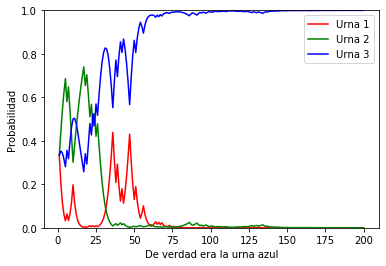

In [51]:
# Gráfico con la evolución de nuestras creencias

colors = ["red", "green", "blue"]
for i in range(3):
    plt.plot(np.arange(1, 201), prob_evol[:, i], label=f'Urna {i+1}', color=colors[i])

plt.xlabel(f"De verdad era la urna {['roja', 'verde', 'azul'][urna-1]}")
plt.ylabel("Probabilidad")
plt.legend()
plt.ylim(0, 1)
plt.show()

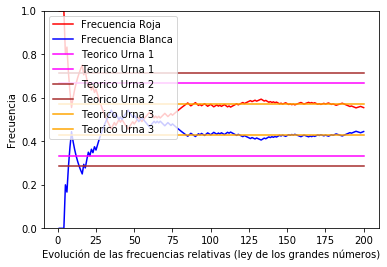

In [52]:
## PROCEDEMOS AHORA CON EL ENFOQUE FRECUENTISTA

# Creamos una matriz para almacenar las frecuencias relativas 
# observadas para R and B y, a continuación, la rellenamos con los datos obtenidos

Pfrec_evol = np.zeros((200, 2))

for i in range(1, 201):
    Pfrec_evol[i - 1, :] = np.array([bolas[:i].count("R") / i, bolas[:i].count("B") / i])

# Gráfico de la evolución de las frecuencias
plt.plot(np.arange(1, 201), Pfrec_evol[:, 0], label="Frecuencia Roja", color="red")
plt.plot(np.arange(1, 201), Pfrec_evol[:, 1], label="Frecuencia Blanca", color="blue")

# Rectas que representan las probabilidades teóricas
w11 = np.full(200, 2/3)
w12 = np.full(200, 1/3)
w21 = np.full(200, 0.2857143)
w22 = np.full(200, 0.7142857)
w31 = np.full(200, 0.4285714)
w32 = np.full(200, 0.5714286)

plt.plot(np.arange(1, 201), w11, label="Teorico Urna 1", color="magenta")
plt.plot(np.arange(1, 201), w12, label="Teorico Urna 1", color="magenta")
plt.plot(np.arange(1, 201), w21, label="Teorico Urna 2", color="brown")
plt.plot(np.arange(1, 201), w22, label="Teorico Urna 2", color="brown")
plt.plot(np.arange(1, 201), w31, label="Teorico Urna 3", color="orange")
plt.plot(np.arange(1, 201), w32, label="Teorico Urna 3", color="orange")

plt.xlabel("Evolución de las frecuencias relativas (ley de los grandes números)")
plt.ylabel("Frecuencia")
plt.legend()
plt.ylim(0, 1)
plt.show()